# Task 3: Customer Segmentation / Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

In [2]:
merged_data = transactions.merge(customers, on="CustomerID", how="inner").merge(products, on="ProductID", how="inner")

### Aggregating data to create customer-level features

In [4]:
customer_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total revenue generated by each customer
    'Quantity': 'sum',  # Total products purchased
    'Region': 'first',  # Region of the customer
    'Category': lambda x: x.mode()[0]
}).reset_index()

### Encode categorical data

In [5]:
customer_data = pd.get_dummies(customer_data, columns=['Region', 'Category'], drop_first=True)

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data.iloc[:, 1:])

### Determine optimal number of clusters using the Elbow Method

In [7]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

### Plot Elbow Method

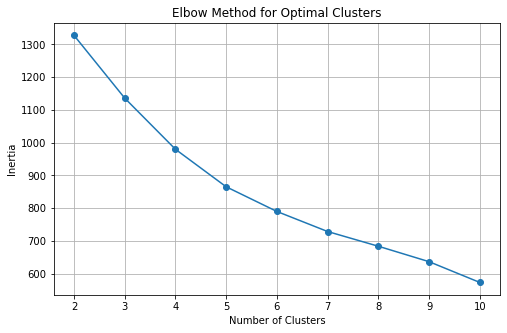

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [9]:
optimal_clusters = 4

### Applying KMeans clustering

In [10]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

### Evaluate clustering using Davies-Bouldin Index

In [11]:
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 1.69


### Visualize clusters (using PCA for 2D representation)

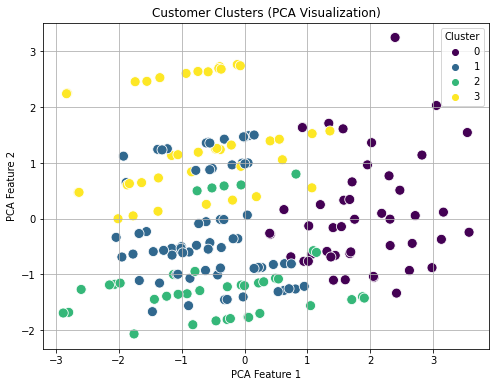

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_data['Cluster'], palette='viridis', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [14]:
clustered_data = customer_data[['CustomerID', 'Cluster']]
clustered_data.to_csv("Boopalamani_J_Clustering.csv", index=False)
print("Clustering results saved to Boopalamani_J_Clustering.csv")

Clustering results saved to Boopalamani_J_Clustering.csv
